<a href="https://colab.research.google.com/github/Shifa-sayed/Customer-Conversion-Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Conversion Prediction**

### **Problem Statement**
You are working for a new-age insurance company and employe mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


### **Features:**

*  age : (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this   client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


*   Output variable (desired target):
y - has the client subscribed to the insurance?


♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦



# **Basic Analysis of Dataset from Problem Statement and Features**

*   It is a supervised learning problem - We are predicting target variable
*   From target varible we can clearly understand it is a classification problem
*   From target variable we can tell it is a binary classification problem.   target = (y/n)


# **Importing Libraries**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [111]:
df=pd.read_csv("train.csv")

# **Analysis of Data**

In [112]:
# Checking size of dataset
print("Data set size : ", df.shape)

Data set size :  (45211, 11)


From the above result no of rows are 45211 and no of columns are 11

In [113]:
# Fetching top 5 rows in dataset
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [114]:
# Fetching Bottom 5 rows in dataset
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [115]:
# Finding the column names
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [116]:
# Basic statistical analysis of dataset
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


From statistical result we can understatnd the basic statistical report of min, max, percentile, mean and standard deviation

In [117]:
# Checking for the data is balanced or not
df['y'].value_counts()

,count
y,
no,39922
yes,5289


From the above result we can clearly understand that the dataset is imbalanced. Lets find the percentage.

In [118]:
# Finding the percentage of the data
print('Percentage for "no": ',((39922) / (39922+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39922+5289)) * 100 )

Percentage for "no":  88.30151954170445
Percentage for "yes":  11.698480458295547


from the above result we can clearly understand that the percentage for "no" is very high so the Majority class "no" with 88.30% and Minority class "yes" with 11.6%.

# **Data Preprocessing**
# **Data Cleaning**

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure that it is ready for analysis. It involves tasks such as handling missing or duplicate data, correcting data types, and removing outliers or irrelevant information.

### **Missing Values**

In [119]:
# Checking for null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


### **Finding Duplicate Values**

In [120]:
# Checking for no of duplicate values
df.duplicated().sum()

6

From the above result we can find 6 duplicate datas. So we will drop the duplicates.

In [121]:
# Dropping duplicates
df = df.drop_duplicates()

In [122]:
# After dropping again checking for duplicate values
df.duplicated().sum()

0

Duplicates are removed from dataset.

### **Checking Data Type**

In [123]:
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


There is no need to change any datatype of the columns

### **Unique Values of Categorical Column**

In [124]:
print("Unique values of Job \n")
print(df['job'].unique())

Unique values of Job 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [125]:
print("Unique values of Marital Status \n")
print(df['marital'].unique())

Unique values of Marital Status 

['married' 'single' 'divorced']


In [126]:
print("Unique values of Educational Qualification \n")
print(df['education_qual'].unique())

Unique values of Educational Qualification 

['tertiary' 'secondary' 'unknown' 'primary']


In [127]:
print("Unique values of Call Type \n")
print(df['call_type'].unique())

Unique values of Call Type 

['unknown' 'cellular' 'telephone']


In [128]:
print("Unique values of Month \n")
print(df['mon'].unique())

Unique values of Month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [129]:
print("Unique values of Previous Outcome \n")
print(df['prev_outcome'].unique())

Unique values of Previous Outcome 

['unknown' 'failure' 'other' 'success']


In [130]:
print("Unique values of Target Variable 'y' \n")
print(df['y'].unique())

Unique values of Target Variable 'y' 

['no' 'yes']


From all the above results all values are unique which means there is no incorrect or wrong data that is spelling mistake, upper case and lower case mismatch of each values.

### **Exploring the Dataset and replacing the unknown values**

**Converting categorical Target column into numerical column.**

In [131]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [132]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


## **Age**

In [133]:
# No of counts for particular age
df.age.value_counts()

,count
age,
32,2084
31,1996
33,1972
34,1929
35,1894
...,...
93,2
90,2
95,2


In [134]:
# Checking for the percentage of how many people get insured? compared with Target vs Age
df.groupby('age')['target'].mean()

,target
age,
18,0.583333
19,0.314286
20,0.300000
21,0.278481
22,0.310078
...,...
90,1.000000
92,1.000000
93,1.000000


## **Job**

In [135]:
# No of counts for particular job
df.job.value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [136]:
# Checking for the percentage of how many people get insured? compared with Target vs Job
df.groupby('job')['target'].mean()

,target
job,
admin.,0.122050
blue-collar,0.072765
entrepreneur,0.082717
housemaid,0.087903
management,0.137570
retired,0.227915
self-employed,0.118429
services,0.088851
student,0.286780


In [137]:
# Finding the percentage of unknown value
print('Percentage for "unknown": ',((288) / (9730+9457+7596+5170+4153+2264+1579+1487+1303+1240+938+288)) * 100 )

Percentage for "unknown":  0.6370976661873686


In [138]:
# Dropping the column unknown
# Out of 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

# Replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)

In [139]:
# Counting the no of null value in job column
df.job.isnull().sum()

288

In [140]:
# Removing null values from job column
df=df.dropna(subset=['job'])

In [141]:
# After removing null values checking for the summ of null values
df.job.isnull().sum()

0

## **Marital Status**

In [142]:
# No of counts for marital status
df.marital.value_counts()

,count
marital,
married,27007
single,12720
divorced,5190


In [143]:
# Checking for the percentage of how many people get insured? compared with Target vs Marital Status
df.groupby('marital')['target'].mean()

,target
marital,
divorced,0.119653
married,0.101233
single,0.149371


## **Educational Qualification**

In [144]:
# No of counts for Educational qualification
df.education_qual.value_counts()

,count
education_qual,
secondary,23128
tertiary,13260
primary,6799
unknown,1730


In [145]:
# Checking for the percentage of how many people get insured? compared with Target vs Educational Qualification
df.groupby('education_qual')['target'].mean()

,target
education_qual,
primary,0.086483
secondary,0.105543
tertiary,0.150226
unknown,0.135260


In [146]:
# Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23128+13260+6799+1730)) * 100 )

Percentage for "Unknown":  3.8515484115145715


Unknown percentage is 3.8% so if we delete also it will not affect the dataset

In [147]:
# Replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

In [148]:
# Checking for null values
df.education_qual.isnull().sum()

1730

In [149]:
# Dropping the null values
df = df. dropna(subset=['education_qual'])

In [150]:
# Checking for null value after deleting
df.education_qual.isnull().sum()

0

## **Call Type**

In [151]:
# No of counts for Call type
df.call_type.value_counts()

,count
call_type,
cellular,28210
unknown,12283
telephone,2694


In [152]:
# Checking for the percentage of how many people get insured? compared with Target vs Call Type
df.groupby('call_type')['target'].mean()

,target
call_type,
cellular,0.147572
telephone,0.129918
unknown,0.041358


In [153]:
# Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12283) / (28210+12283+2694)) * 100 )

Percentage for "Unknown":  28.441429133767105


Unknown call type percentage is 28.44% so we will keep as it is.

## **Day**

In [154]:
# No of counts for Day
df.day.value_counts()

,count
day,
20,2628
18,2227
21,1961
17,1872
6,1817
5,1796
14,1784
8,1758
7,1739


In [155]:
# Checking for the percentage of how many people get insured? compared with Target vs Day
df.groupby('day')['target'].mean()

,target
day,
1,0.278689
2,0.139179
3,0.166506
4,0.160350
5,0.114143
6,0.094111
7,0.086832
8,0.105802
9,0.113284


## **Month**

In [156]:
# No of counts for month
df.mon.value_counts()

,count
mon,
may,13191
jul,6600
aug,6035
jun,4978
nov,3842
apr,2820
feb,2533
jan,1318
oct,690


In [157]:
# Checking for the percentage of how many people get insured? compared with Target vs Month
df.groupby('mon')['target'].mean()

,target
mon,
apr,0.192553
aug,0.109196
dec,0.465000
feb,0.165022
jan,0.100152
jul,0.088788
jun,0.105062
mar,0.537946
may,0.067319


## **Duration**

In [158]:
# No of counts for duration
df.dur.value_counts()

,count
dur,
124,176
90,172
89,172
114,172
122,169
...,...
1327,1
1331,1
1608,1


In [159]:
# Checking for the percentage of how many people get insured? compared with Target vs Duration
df.groupby('dur')['target'].mean()

,target
dur,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3366,0.0
3422,0.0
3785,0.0


## **Number of Calls**

In [160]:
# No of counts for number of calls
df.num_calls.value_counts()

,count
num_calls,
1,16740
2,11936
3,5277
4,3397
5,1703
6,1234
7,696
8,516
9,307


In [161]:
# Checking for the percentage of how many people get insured? compared with Target vs Number of Calls
df.groupby('num_calls')['target'].mean()

,target
num_calls,
1,0.145221
2,0.110841
3,0.111237
4,0.088902
5,0.079859
6,0.072123
7,0.064655
8,0.058140
9,0.065147


## **Previous Outcome**

In [162]:
# No of counts for previous outcome
df.prev_outcome.value_counts()

,count
prev_outcome,
unknown,35280
failure,4709
other,1774
success,1424


In [163]:
# Checking for the percentage of how many people get insured? compared with Target vs Previous outcome
df.groupby('prev_outcome')['target'].mean()

,target
prev_outcome,
failure,0.124655
other,0.165163
success,0.643961
unknown,0.091383


In [164]:
# Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


It is around 81% values are unknown. So we will keep unknown value as it is.

## **Target Variable Y**

In [165]:
# No of counts of target variable y
df.y.value_counts()

,count
y,
no,38166
yes,5021


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# **Outlier Deduction and Correction**
**Outlier Detection**
1.   Z-Score-->
      Z-Score(x)=(x-mean(x)) / SD(x)
      **Threshold Limit**
      Z-Score > 3 and Z-Score < -3 ---> Outlier
2.   IQR-->
      IQR = Q3(75%)-Q1(25%)
      **Upper Threshold** = Q3 + (1.5 * IQR)
      **Lower Threshold** = Q1 - (1.5 * IQR)
3.   Plotting-->
      Box Plot

**Outlier Correction**
1.   Deletion
2.   Clip/Strip



In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


## **Age**

**Box Plot**

<Axes: xlabel='age'>

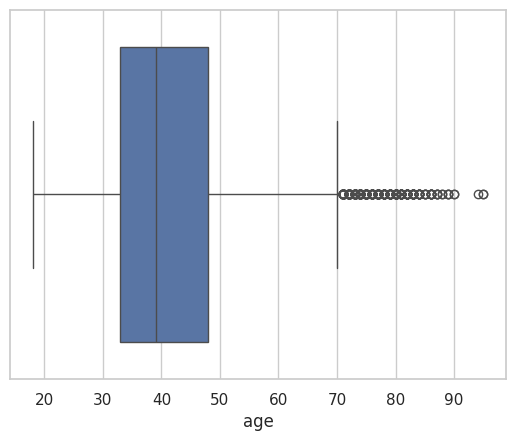

In [168]:
# Outlier Deduction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'])

From outlier we can see that there are many dots displayed outside the whisker.

**IQR**

In [169]:
# Detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


**Removing outlier for Age**

In [170]:
# Removing outlier for age column
# Clip/Strip is used to deduct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

In [171]:
df.age.describe()

,age
count,43187.000000
mean,40.702549
std,10.305239
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,70.500000


**Checking- After outlier removal**

<Axes: xlabel='age'>

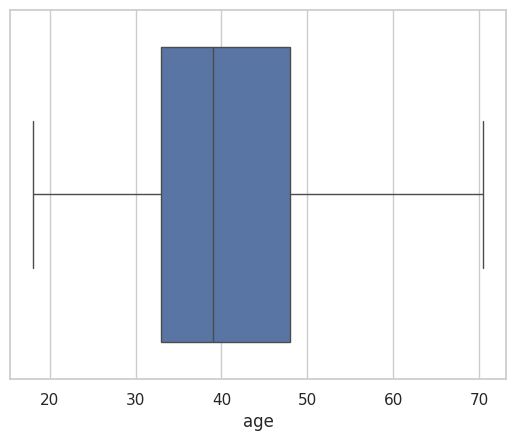

In [172]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'])

## **Day**

**Box Plot**

<Axes: xlabel='day'>

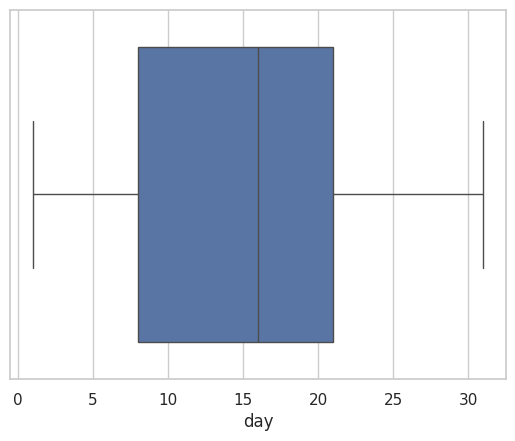

In [173]:
# Outlier Deduction using Box Plot for Day Column
sns.set(style="whitegrid")
sns.boxplot(x=df['day'])

**IQR**

In [174]:
# Detecting Outlier for Day column
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [175]:
df.day.describe()

,day
count,43187.000000
mean,15.809896
std,8.305826
min,1.000000
25%,8.000000
50%,16.000000
75%,21.000000
max,31.000000


From Box plot itself we can tell there is no outlier, even though checked with IQR approach. min and max values are in between lower and upper bound.

## **Duration**

**Box Plot**

<Axes: xlabel='dur'>

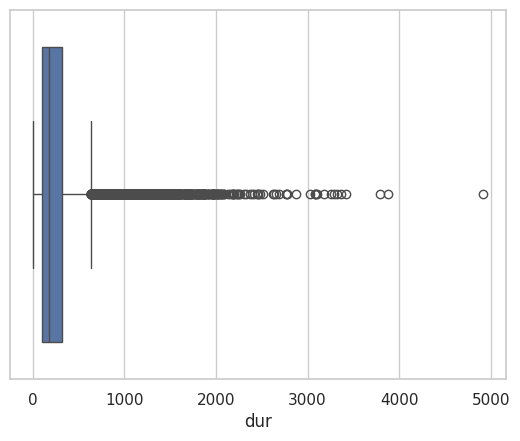

In [176]:
# Outlier Deduction using Box Plot for Duration Column
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'])

**IQR**

In [177]:
# Detecting Outlier for Duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


**Removing Outlier for duration column**

In [178]:
# Removing outlier for duration column
# Clip/Strip is used to deduct value to lower & upper threshold.
df.dur = df.dur.clip(-219.5,640.5)

In [179]:
df.dur.describe()

,dur
count,43187.000000
mean,234.788038
std,176.240001
min,0.000000
25%,103.000000
50%,180.000000
75%,318.000000
max,640.500000


**Checking after outlier removal**

<Axes: xlabel='dur'>

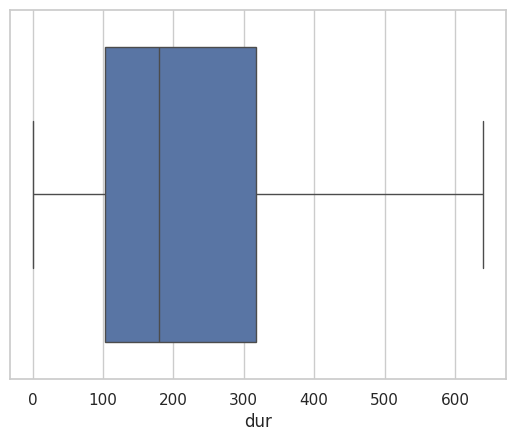

In [180]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'])

## **No of Calls**

**Box Plot**

<Axes: xlabel='num_calls'>

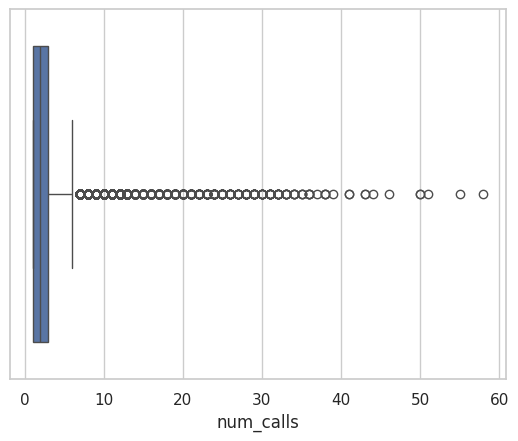

In [181]:
# Checking for outlier using boxplot fot the column number of calls
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'])

**IQR**

In [182]:
# Detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [183]:
# Removing outlier for num_calls column
# Clip/Strip is used to deduct value to lower & upper threshold.
df.num_calls = df.num_calls.clip(-2,6.0)

In [184]:
df.num_calls.describe()

,num_calls
count,43187.000000
mean,2.393081
std,1.598892
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


**Checking after outlier removal**

<Axes: xlabel='num_calls'>

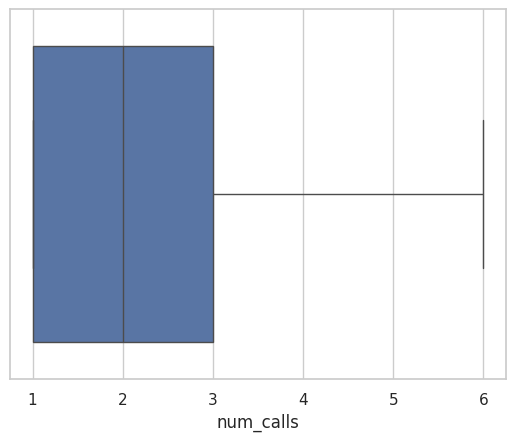

In [185]:
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'])

we detected and removed outlier from all numerical columns. So we are done with Data Cleaning Process.

# **EDA - Exploratory Data Analysis**

EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

### **Distribution of Feature and Target variable**

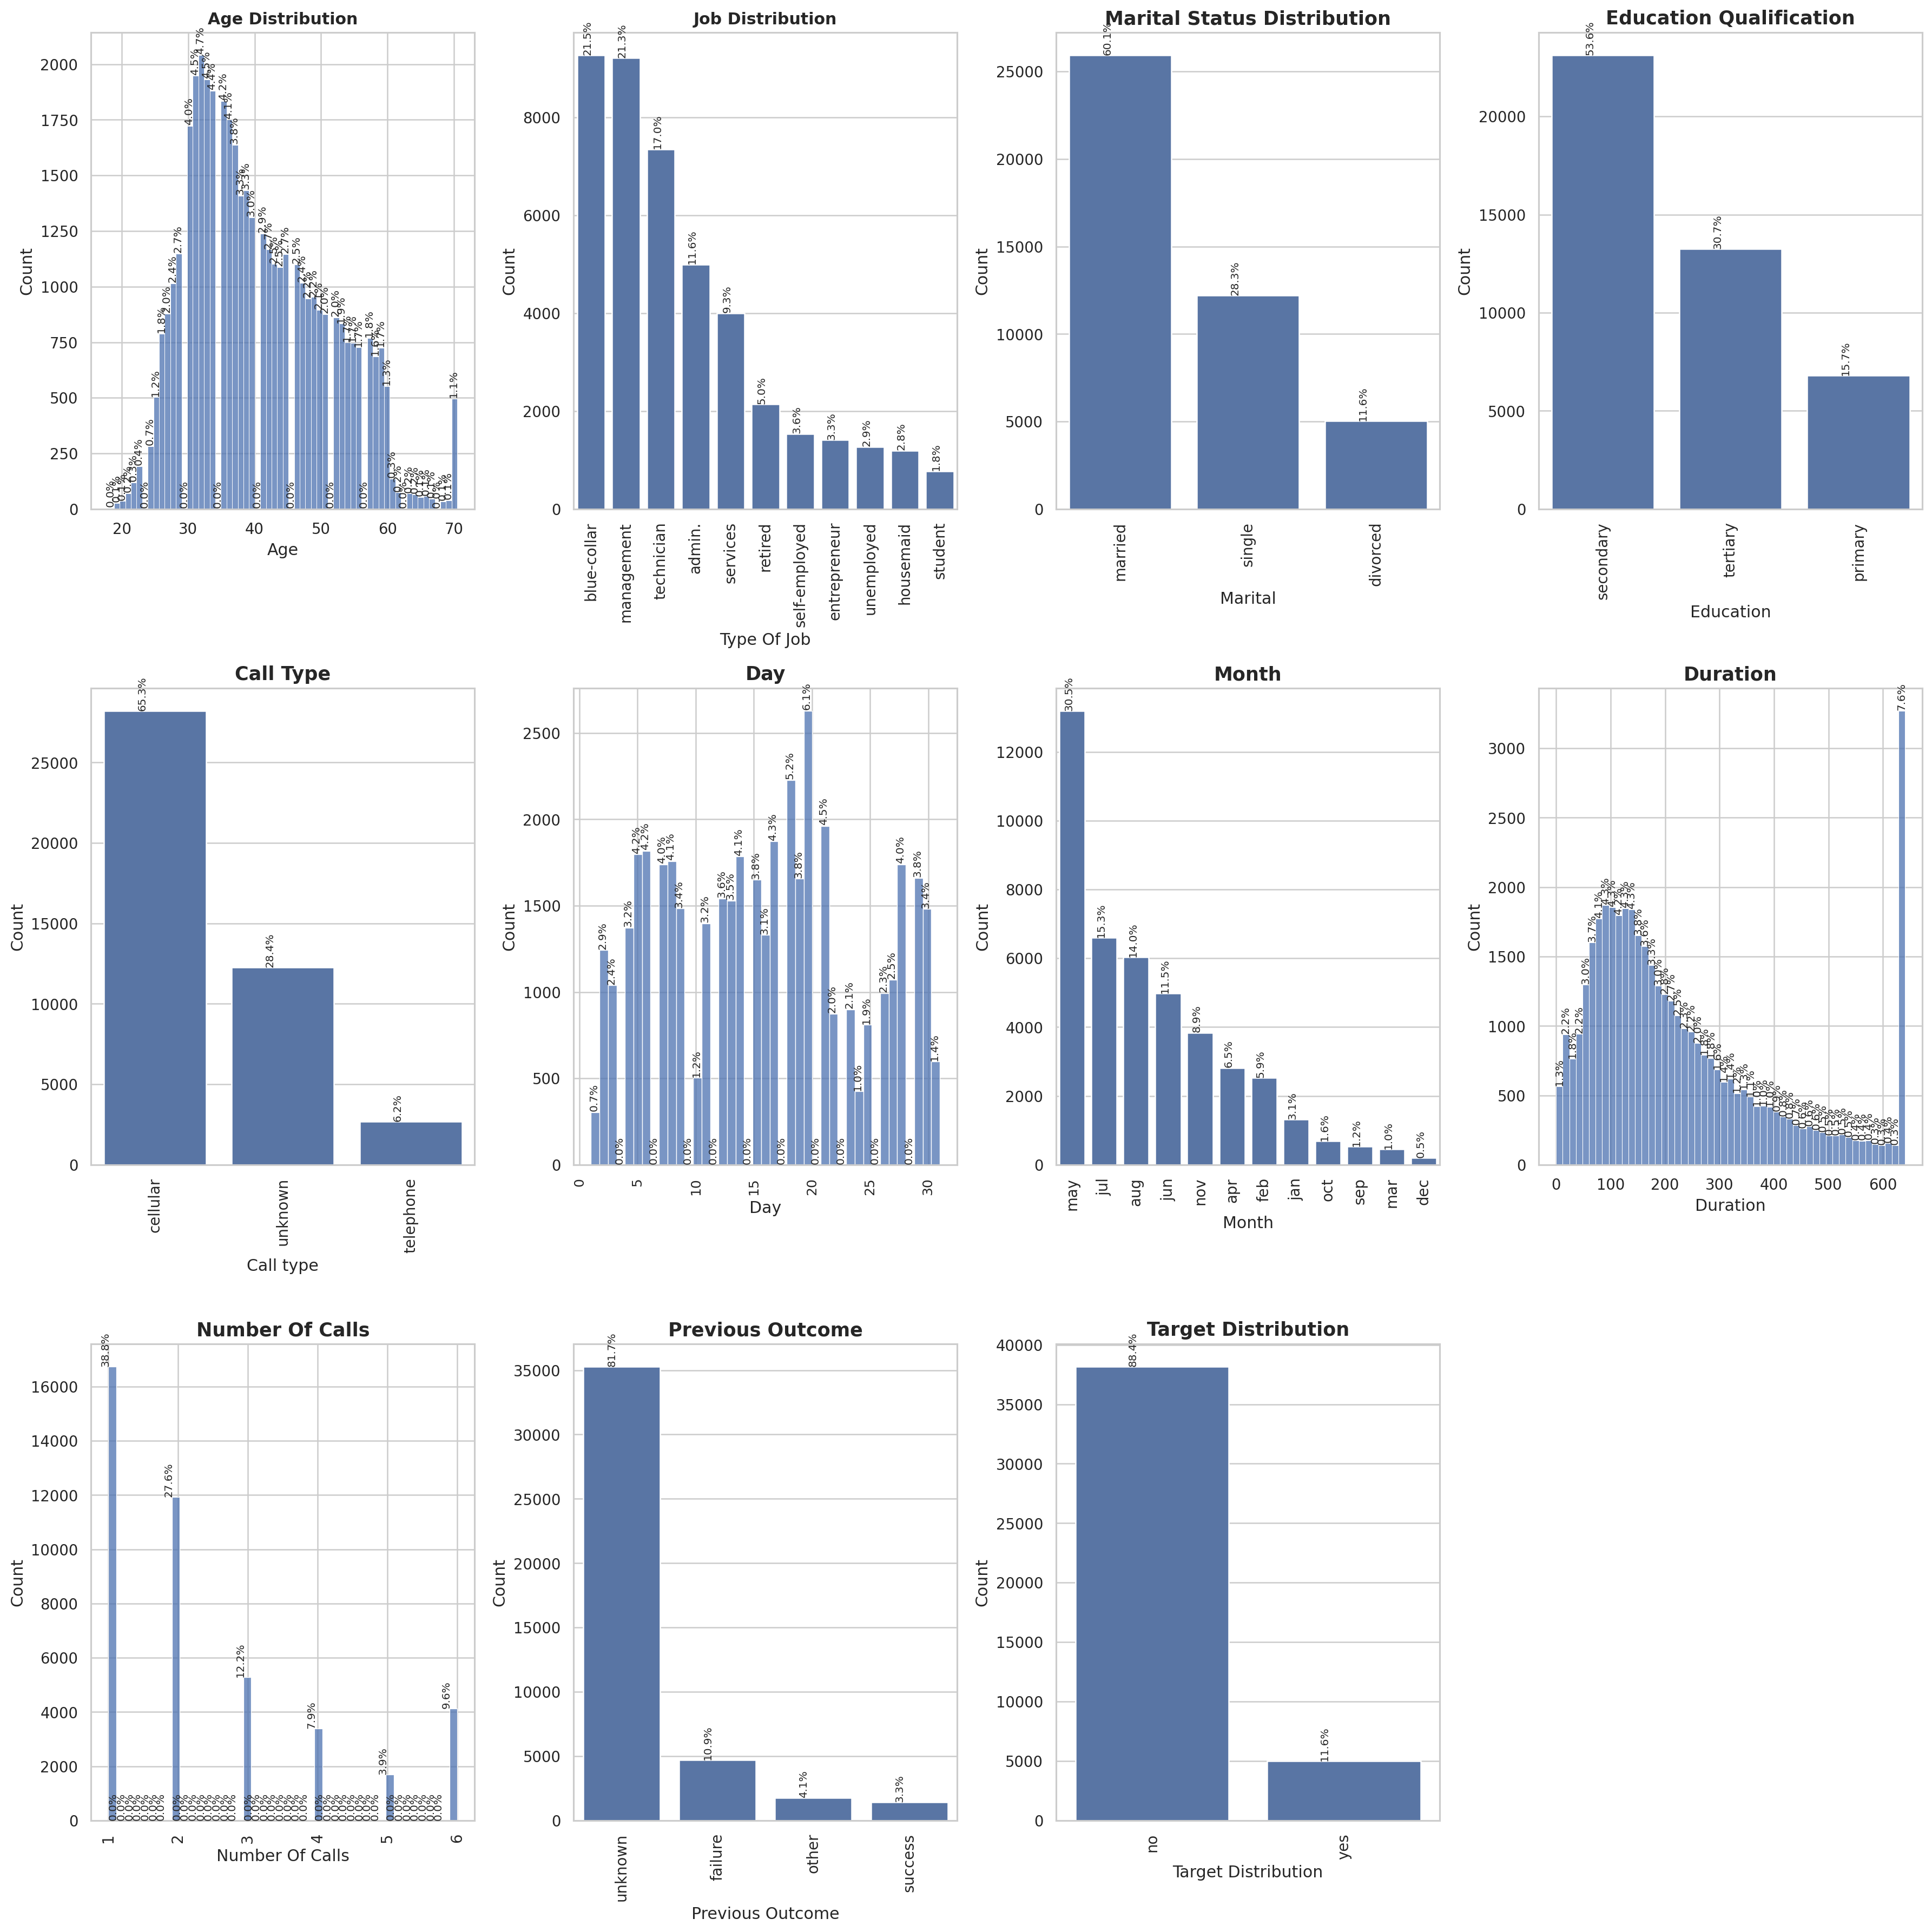

In [186]:
# Age distribution
plt.figure(figsize = (20,20),dpi=180)
plt.subplot(3,4,1)
sns.histplot((df.age))

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['age']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Age Distribution', fontsize = 12, fontweight='bold')
plt.xlabel('Age',fontsize = 12)
plt.ylabel('Count',fontsize = 12)



# Job distribution
plt.subplot(3,4,2)
sns.countplot(x=df['job'],order=df.job.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['job']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Job Distribution', fontsize = 12, fontweight='bold')
plt.xlabel('Type Of Job',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Marital distribution
plt.subplot(3,4,3)
sns.countplot(x=df['marital'],order=df.marital.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['marital']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Marital Status Distribution', fontsize = 14,fontweight='bold')
plt.xlabel('Marital',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Education qualification distribution
plt.subplot(3,4,4)
sns.countplot(x=df['education_qual'],order=df.education_qual.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['education_qual']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Education Qualification', fontsize = 14,fontweight='bold')
plt.xlabel('Education',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Call type distribution
plt.subplot(3,4,5)
sns.countplot(x=df['call_type'],order=df.call_type.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['call_type']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Call Type', fontsize = 14,fontweight='bold')
plt.xlabel('Call type',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Day distribution
plt.subplot(3,4,6)
sns.histplot(df['day'])

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['day']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Day', fontsize = 14,fontweight='bold')
plt.xlabel('Day',fontsize = 12)
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Count',fontsize = 12)




# Mon distribution
plt.subplot(3,4,7)
sns.countplot(x=df['mon'],order=df.mon.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['mon']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Month', fontsize = 14,fontweight='bold')
plt.xlabel('Month',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Dur distribution
plt.subplot(3,4,8)
sns.histplot((df.dur))

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['dur']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Duration', fontsize = 14,fontweight='bold')
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Count',fontsize = 12)



# Num call distribution
plt.subplot(3,4,9)
sns.histplot(df['num_calls'])

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['num_calls']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Number Of Calls', fontsize = 14,fontweight='bold')
plt.xlabel('Number Of Calls',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Previous outcome distribution
plt.subplot(3,4,10)
sns.countplot(x=df['prev_outcome'],order=df.prev_outcome.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['prev_outcome']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Previous Outcome', fontsize = 14,fontweight='bold')
plt.xlabel('Previous Outcome',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)



# Target distribution
plt.subplot(3,4,11)
sns.countplot(x=df['y'])

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['y']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom')

plt.title('Target Distribution', fontsize = 14,fontweight='bold')
plt.xlabel('Target Distribution',fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12)

plt.tight_layout()


plt.show()

**From the above plots we can clearly tell the following interpretation**

### **1. Age**

*   Most Target : 30 to 40 years
*   Least Target : below 20 and above 60


### **2. Job**

*   Most Target : blue-collar and management
*   Least Target : students and house maid

### **3. Marital Status**

*   Most Target : Married
*   Least Target : Divorced

### **4. Educational Qualification**

*   Most Target : Secondary
*   Least Target : Primary

### **5. Call Type**

*   Most Target : cellular
*   Least Target : telephone

### **6. Day**   

*   Most Target : Mid of the month
*   Least Target : Beginning of the month

### **7. Month**

*   Most Target : May
*   Least Target : December

### **8. Duration**

*   Most Target : call last around 1750 seconds
*   Least Target : call last around 100 to 200 seconds

### **9. Number of Calls**

*   Most Target : most people contacted one time
*   Least Target : least people contacted 5 times

### **10. Previous Outcome**

*   Most Target : most people previous outcome was unknown
*   Least Target : Previous outcome for least people are success

### **11. Target**

*   No of people insured is very less percentage (ie) 88%, only few percentage are insured.


# **Features vs Target**

### **Categorical Variable vs Target (Categorical) -- Job, Marital, Educational Qualification, Call Type, Month**

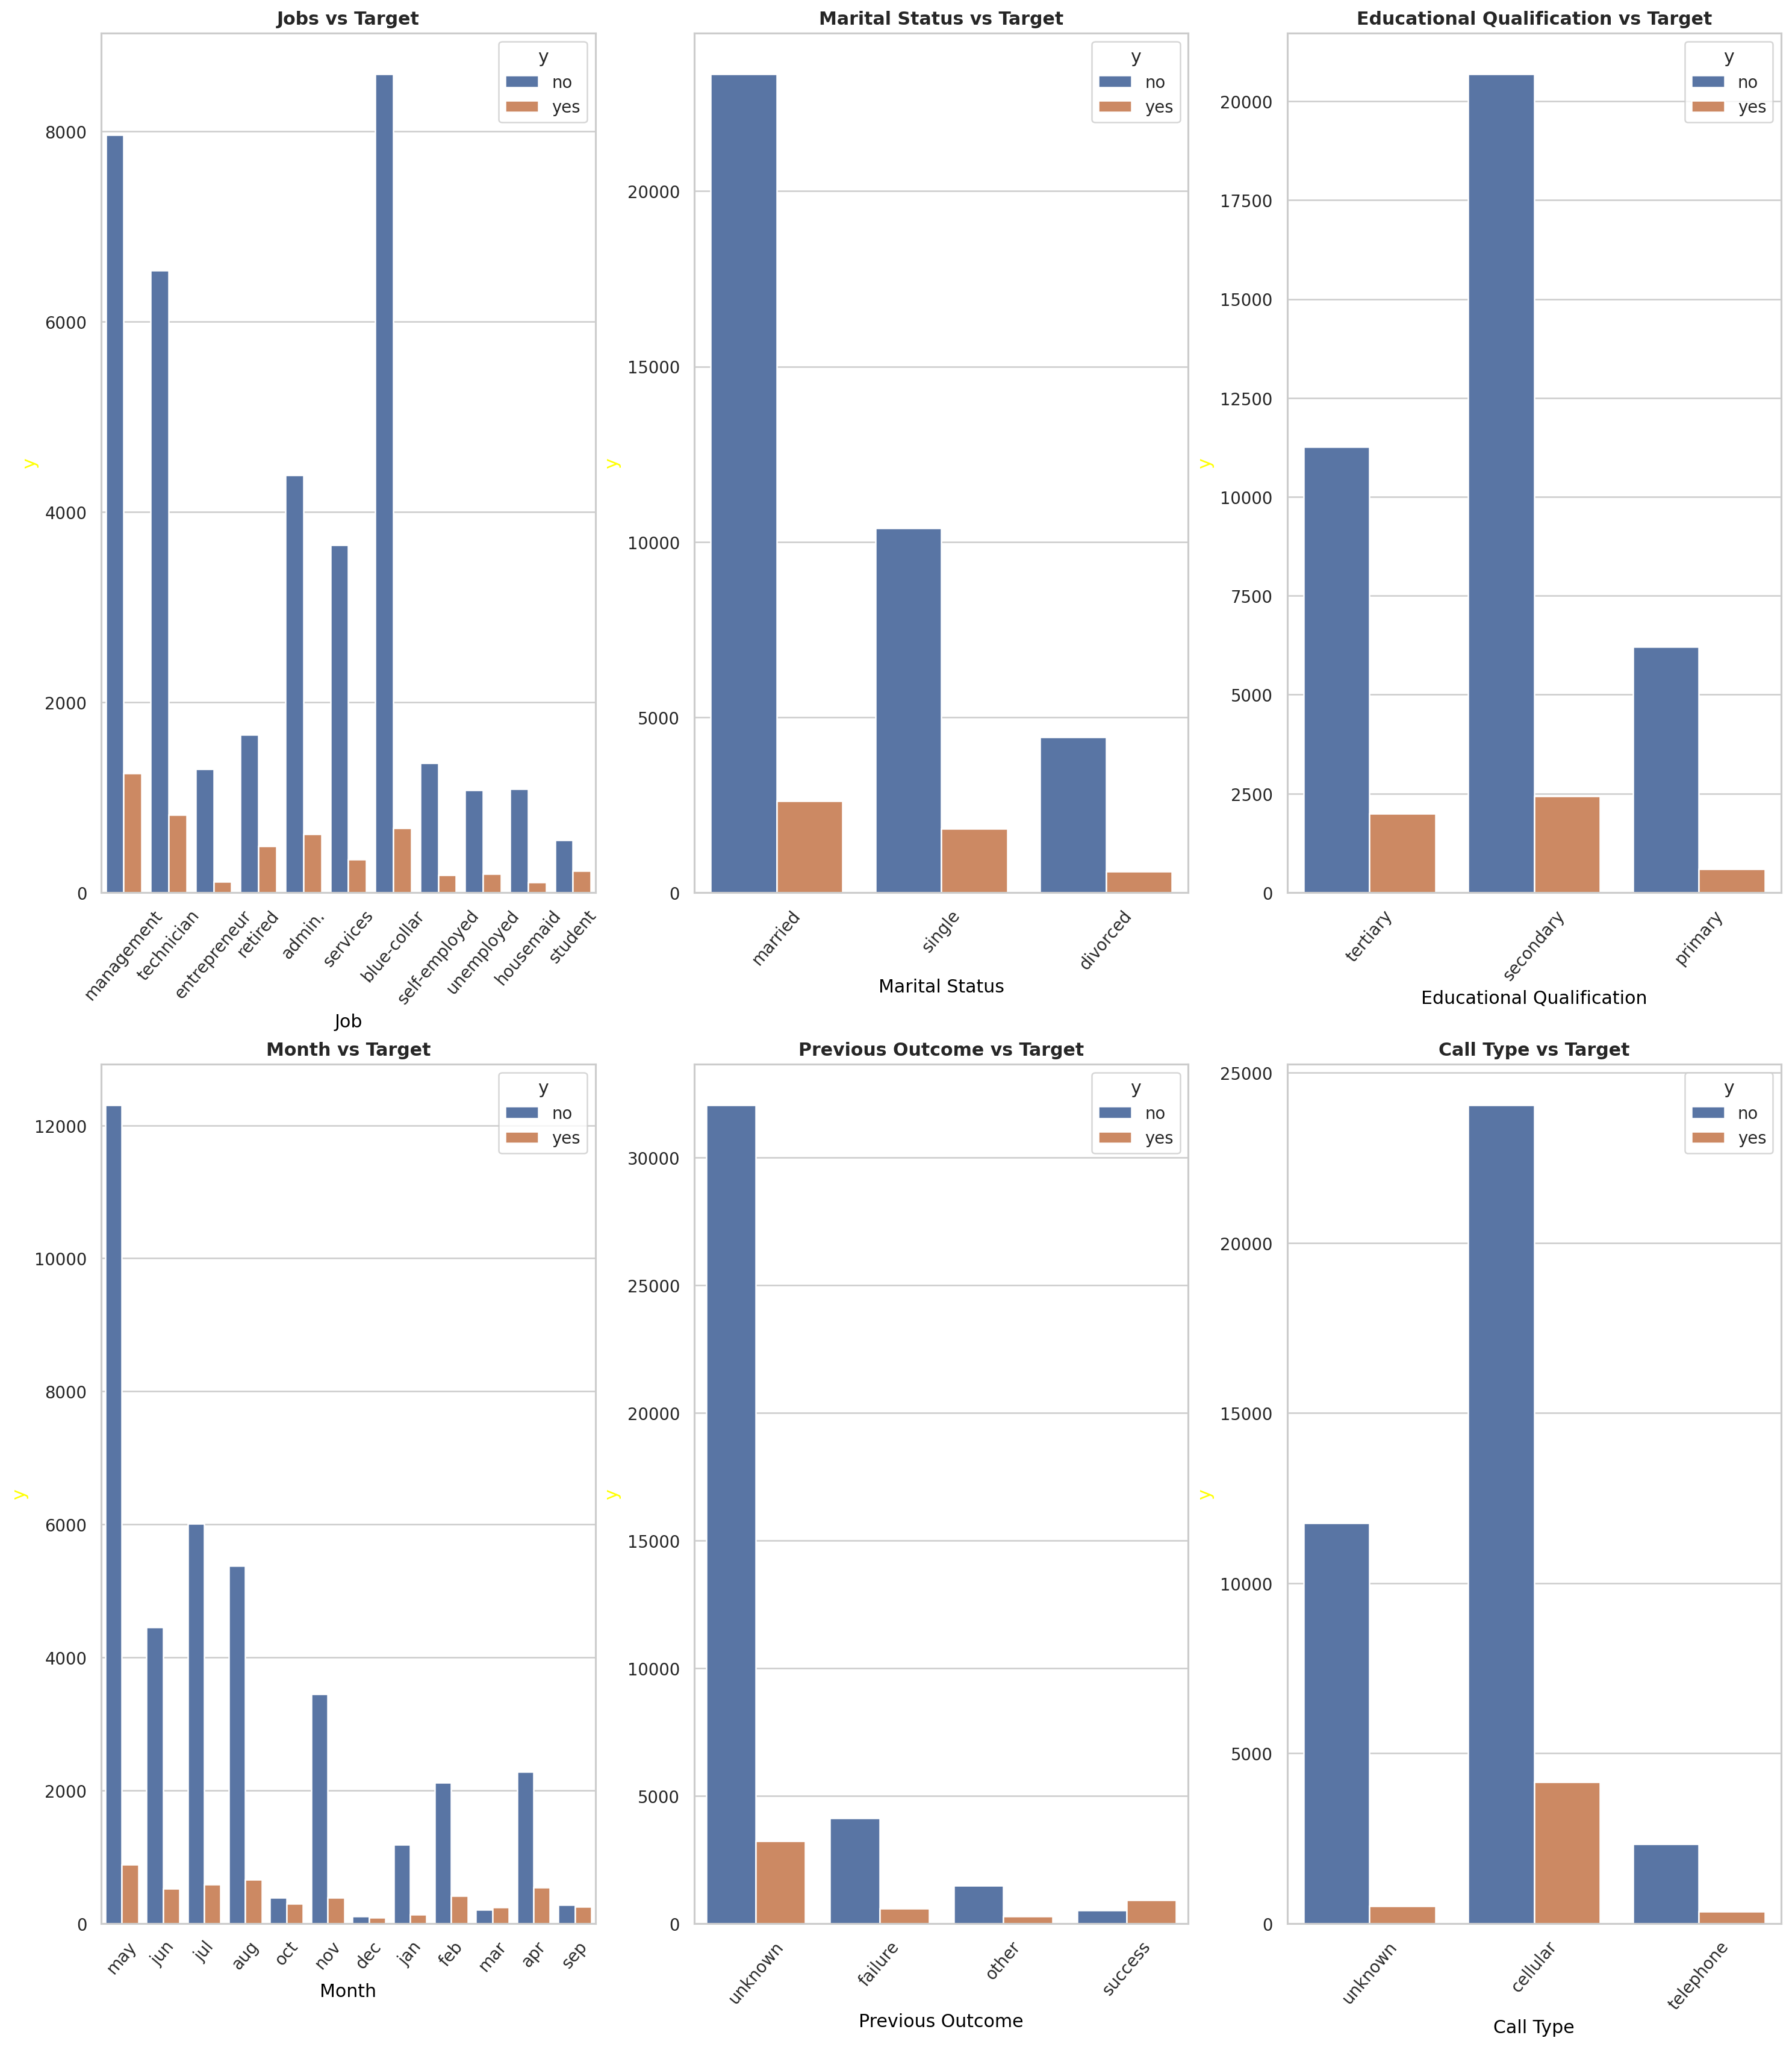

In [187]:
plt.figure(figsize=(20,35), dpi=180)
# plt.subtitle("Categorical Data Vs Target", fontsize=20, fontweight='bold')

# Jobs vs Target
plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold')
plt.xlabel('Job', color='Black')
plt.ylabel('y', color='Yellow')

# Marital Status vs Target
plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold')
plt.xlabel('Marital Status', color='Black')
plt.ylabel('y', color='Yellow')

# Educational Qualification vs Target
plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold')
plt.xlabel('Educational Qualification', color='Black')
plt.ylabel('y', color='Yellow')

# Month vs Target
plt.subplot(3,3,4)
sns.countplot(x='mon',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold')
plt.xlabel('Month', color='Black')
plt.ylabel('y', color='Yellow')

# Previous Outcome vs Target
plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold')
plt.xlabel('Previous Outcome', color='Black')
plt.ylabel('y', color='Yellow')

# Call Type vs Target
plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold')
plt.xlabel('Call Type', color='Black')
plt.ylabel('y', color='Yellow')

plt.show()


### **Categorical Data Vs Target**
**Jobs vs Target**

*   Target (No) : Blue Collar
*   Subscribed (Yes): Management

**Marital Status vs Target**

*   Target (No) : Married
*   Subscribed (Yes): Married

**Educational Qualification vs Target**

*   Target (No): Secondary
*   Subscribed (Yes): Secondary

**Month vs Target**

*   Target (No): May
*   Subscribed (Yes): May

**Previous Outcome vs Target**

*   Target (No): unknown
*   Subscribed (Yes): unknown

**Call Type vs Target**

*   Target (No): Cellular
*   Subscribed (Yes): Cellular

### **Feature VS Target Distribution - Percentage of people Subscribed**

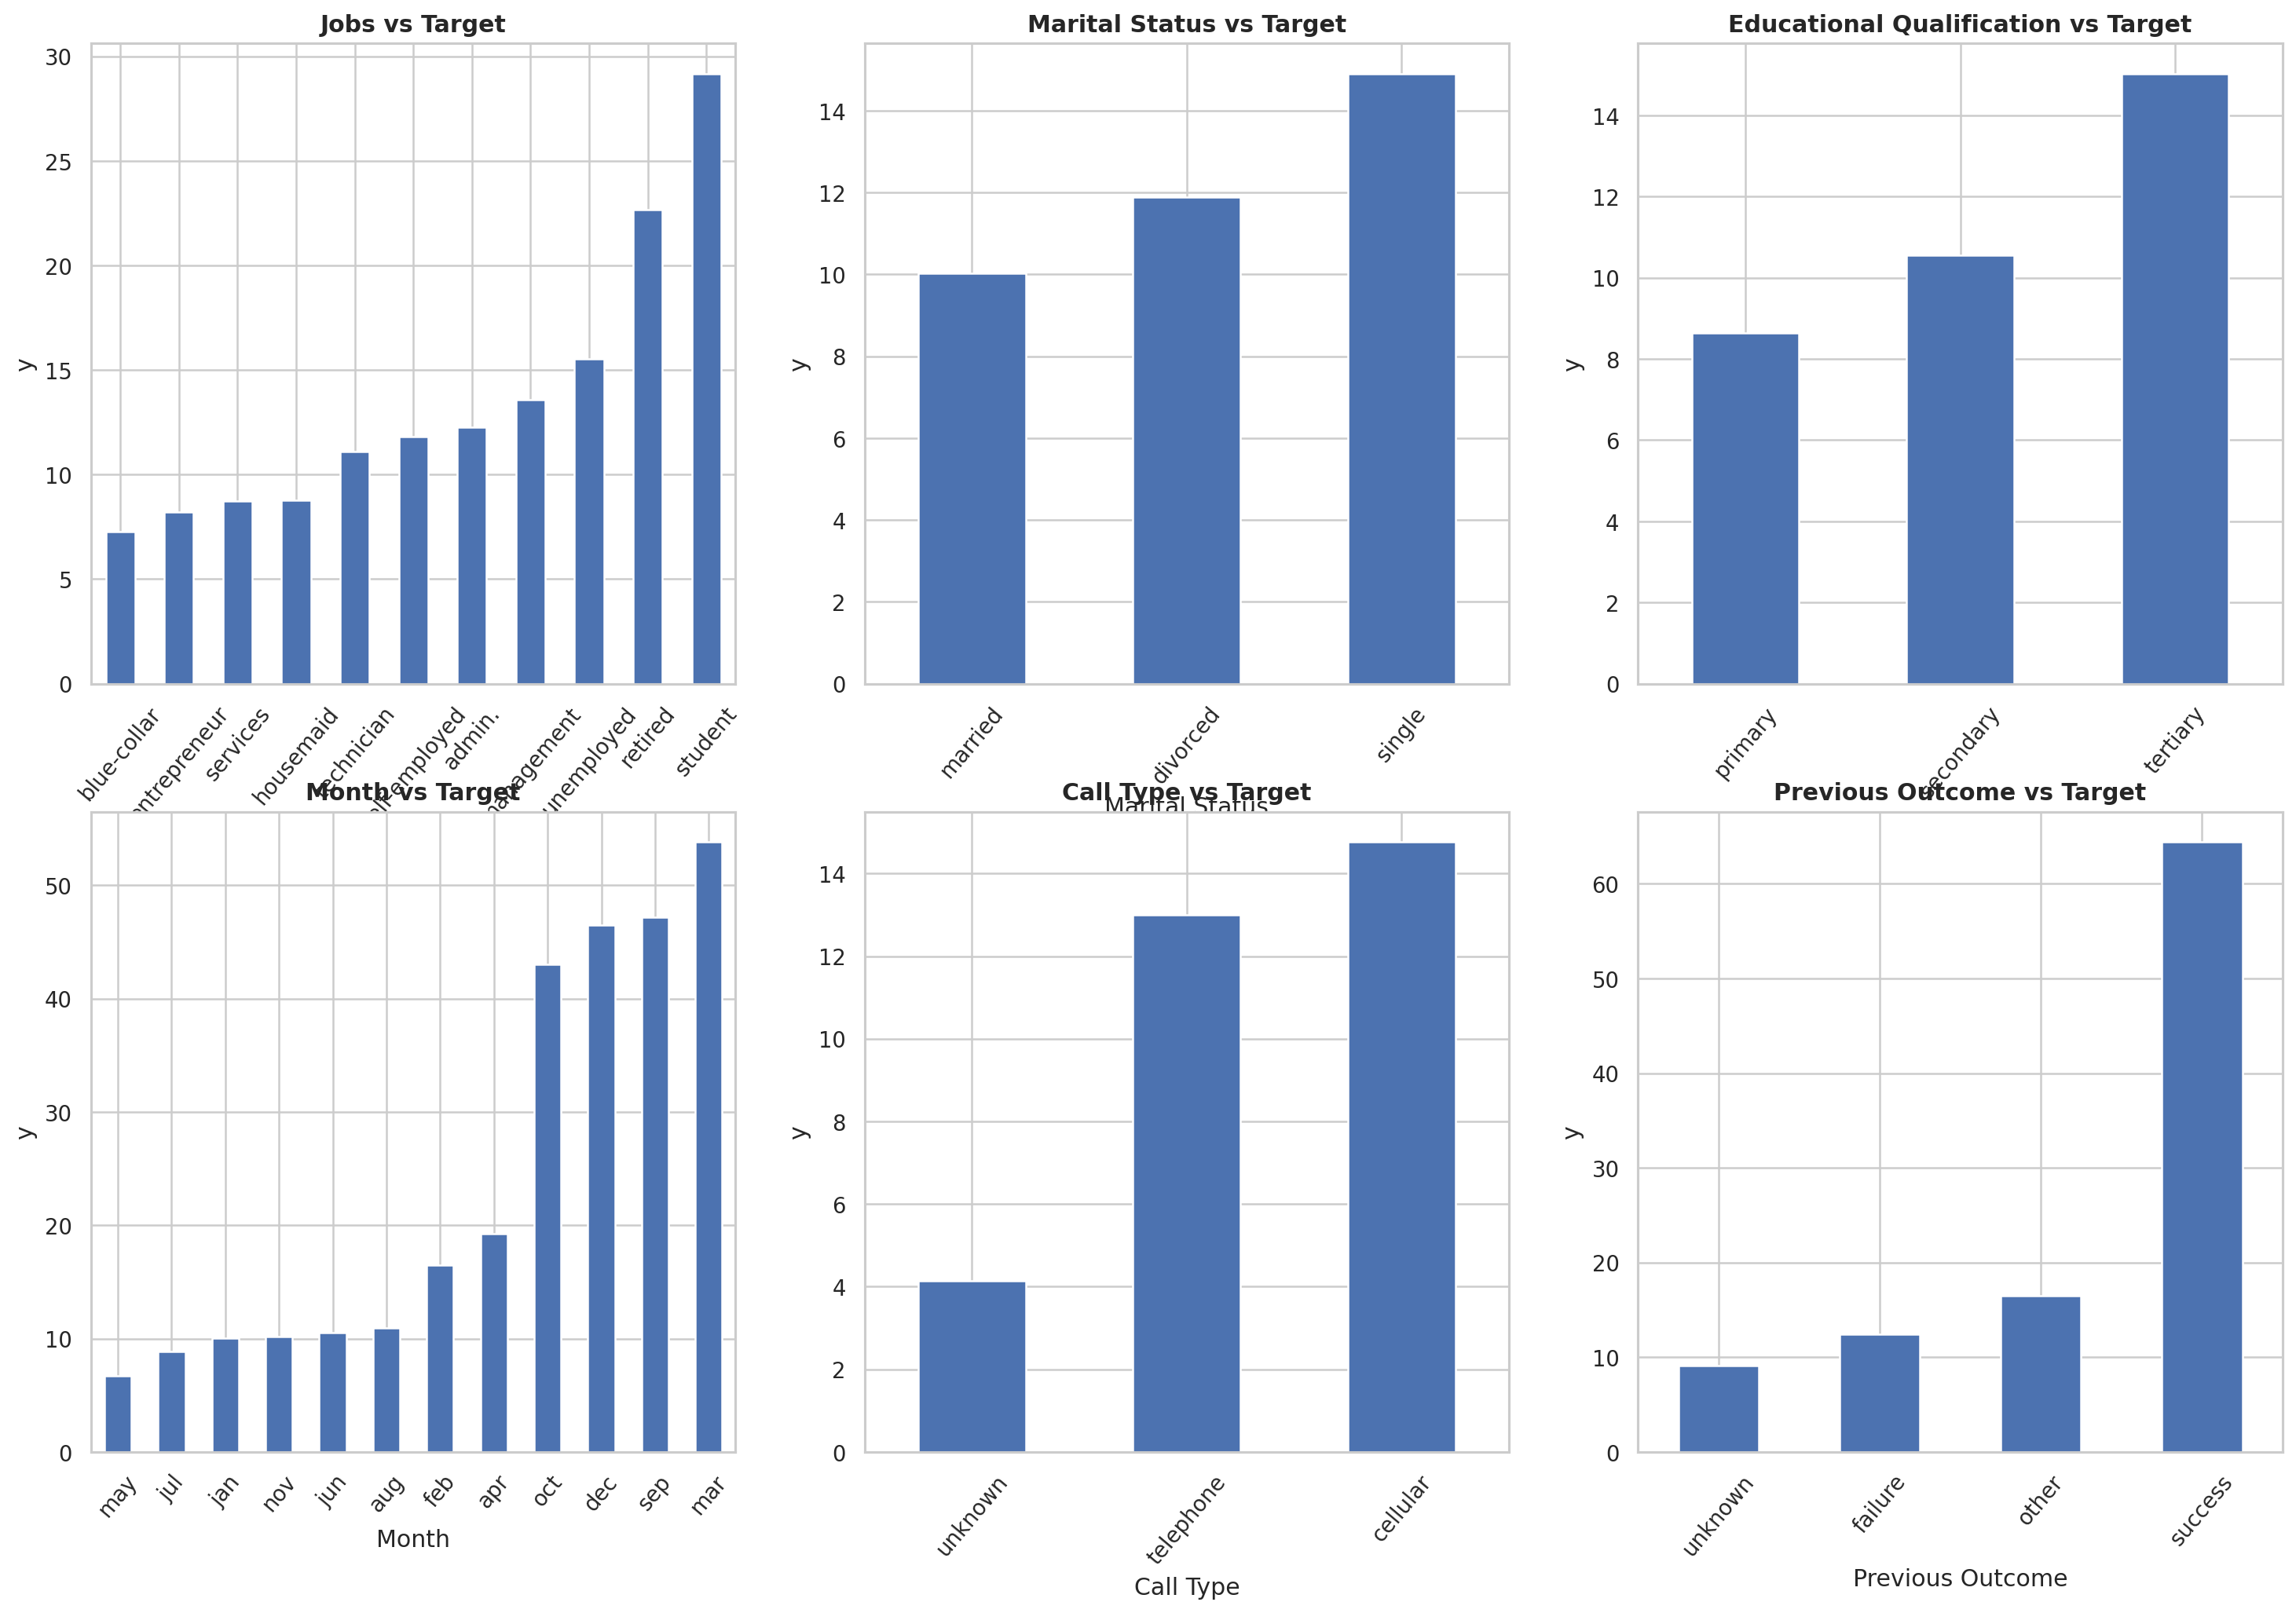

In [188]:
plt.figure(figsize=(20,20), dpi=180)
# plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold')

# Jobs vs Target
plt.subplot(3,3,1)
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold')
plt.xlabel('Job')
plt.ylabel('y')

# Marital Status vs Target
plt.subplot(3,3,2)
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('y')

# Educational Qualification vs Target
plt.subplot(3,3,3)
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold')
plt.xlabel('Educational Qualification')
plt.ylabel('y')

# Month vs Target
plt.subplot(3,3,4)
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('y')

# Call Type vs Target
plt.subplot(3,3,5)
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold')
plt.xlabel('Call Type')
plt.ylabel('y')

# Previous Outcome vs Target
plt.subplot(3,3,6)
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold')
plt.xlabel('Previous Outcome')
plt.ylabel('y')


plt.show()


### **Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)**
**Jobs vs Target**

*   Most subscribed % : Student, retired
*   Least Subscribed % : blue-collar

**Marital Status vs Target**

*   Most subscribed % : Single
*   Least Subscribed % : Married

**Educational Qualification vs Target**

*   Most subscribed % : teritary
*   Least Subscribed % : primary

**Month vs Target**

*   Most subscribed % : March, September
*   Least Subscribed % : May

**Call Type vs Target**

*   Most subscribed % : Cellular
*   Least Subscribed % : unknown

**Previous Outcome vs Target**

*   Most subscribed % : Success
*   Least Subscribed % : unknown



### **Numerical Variable vs Target -- Age, Day, Duration, No of Calls**

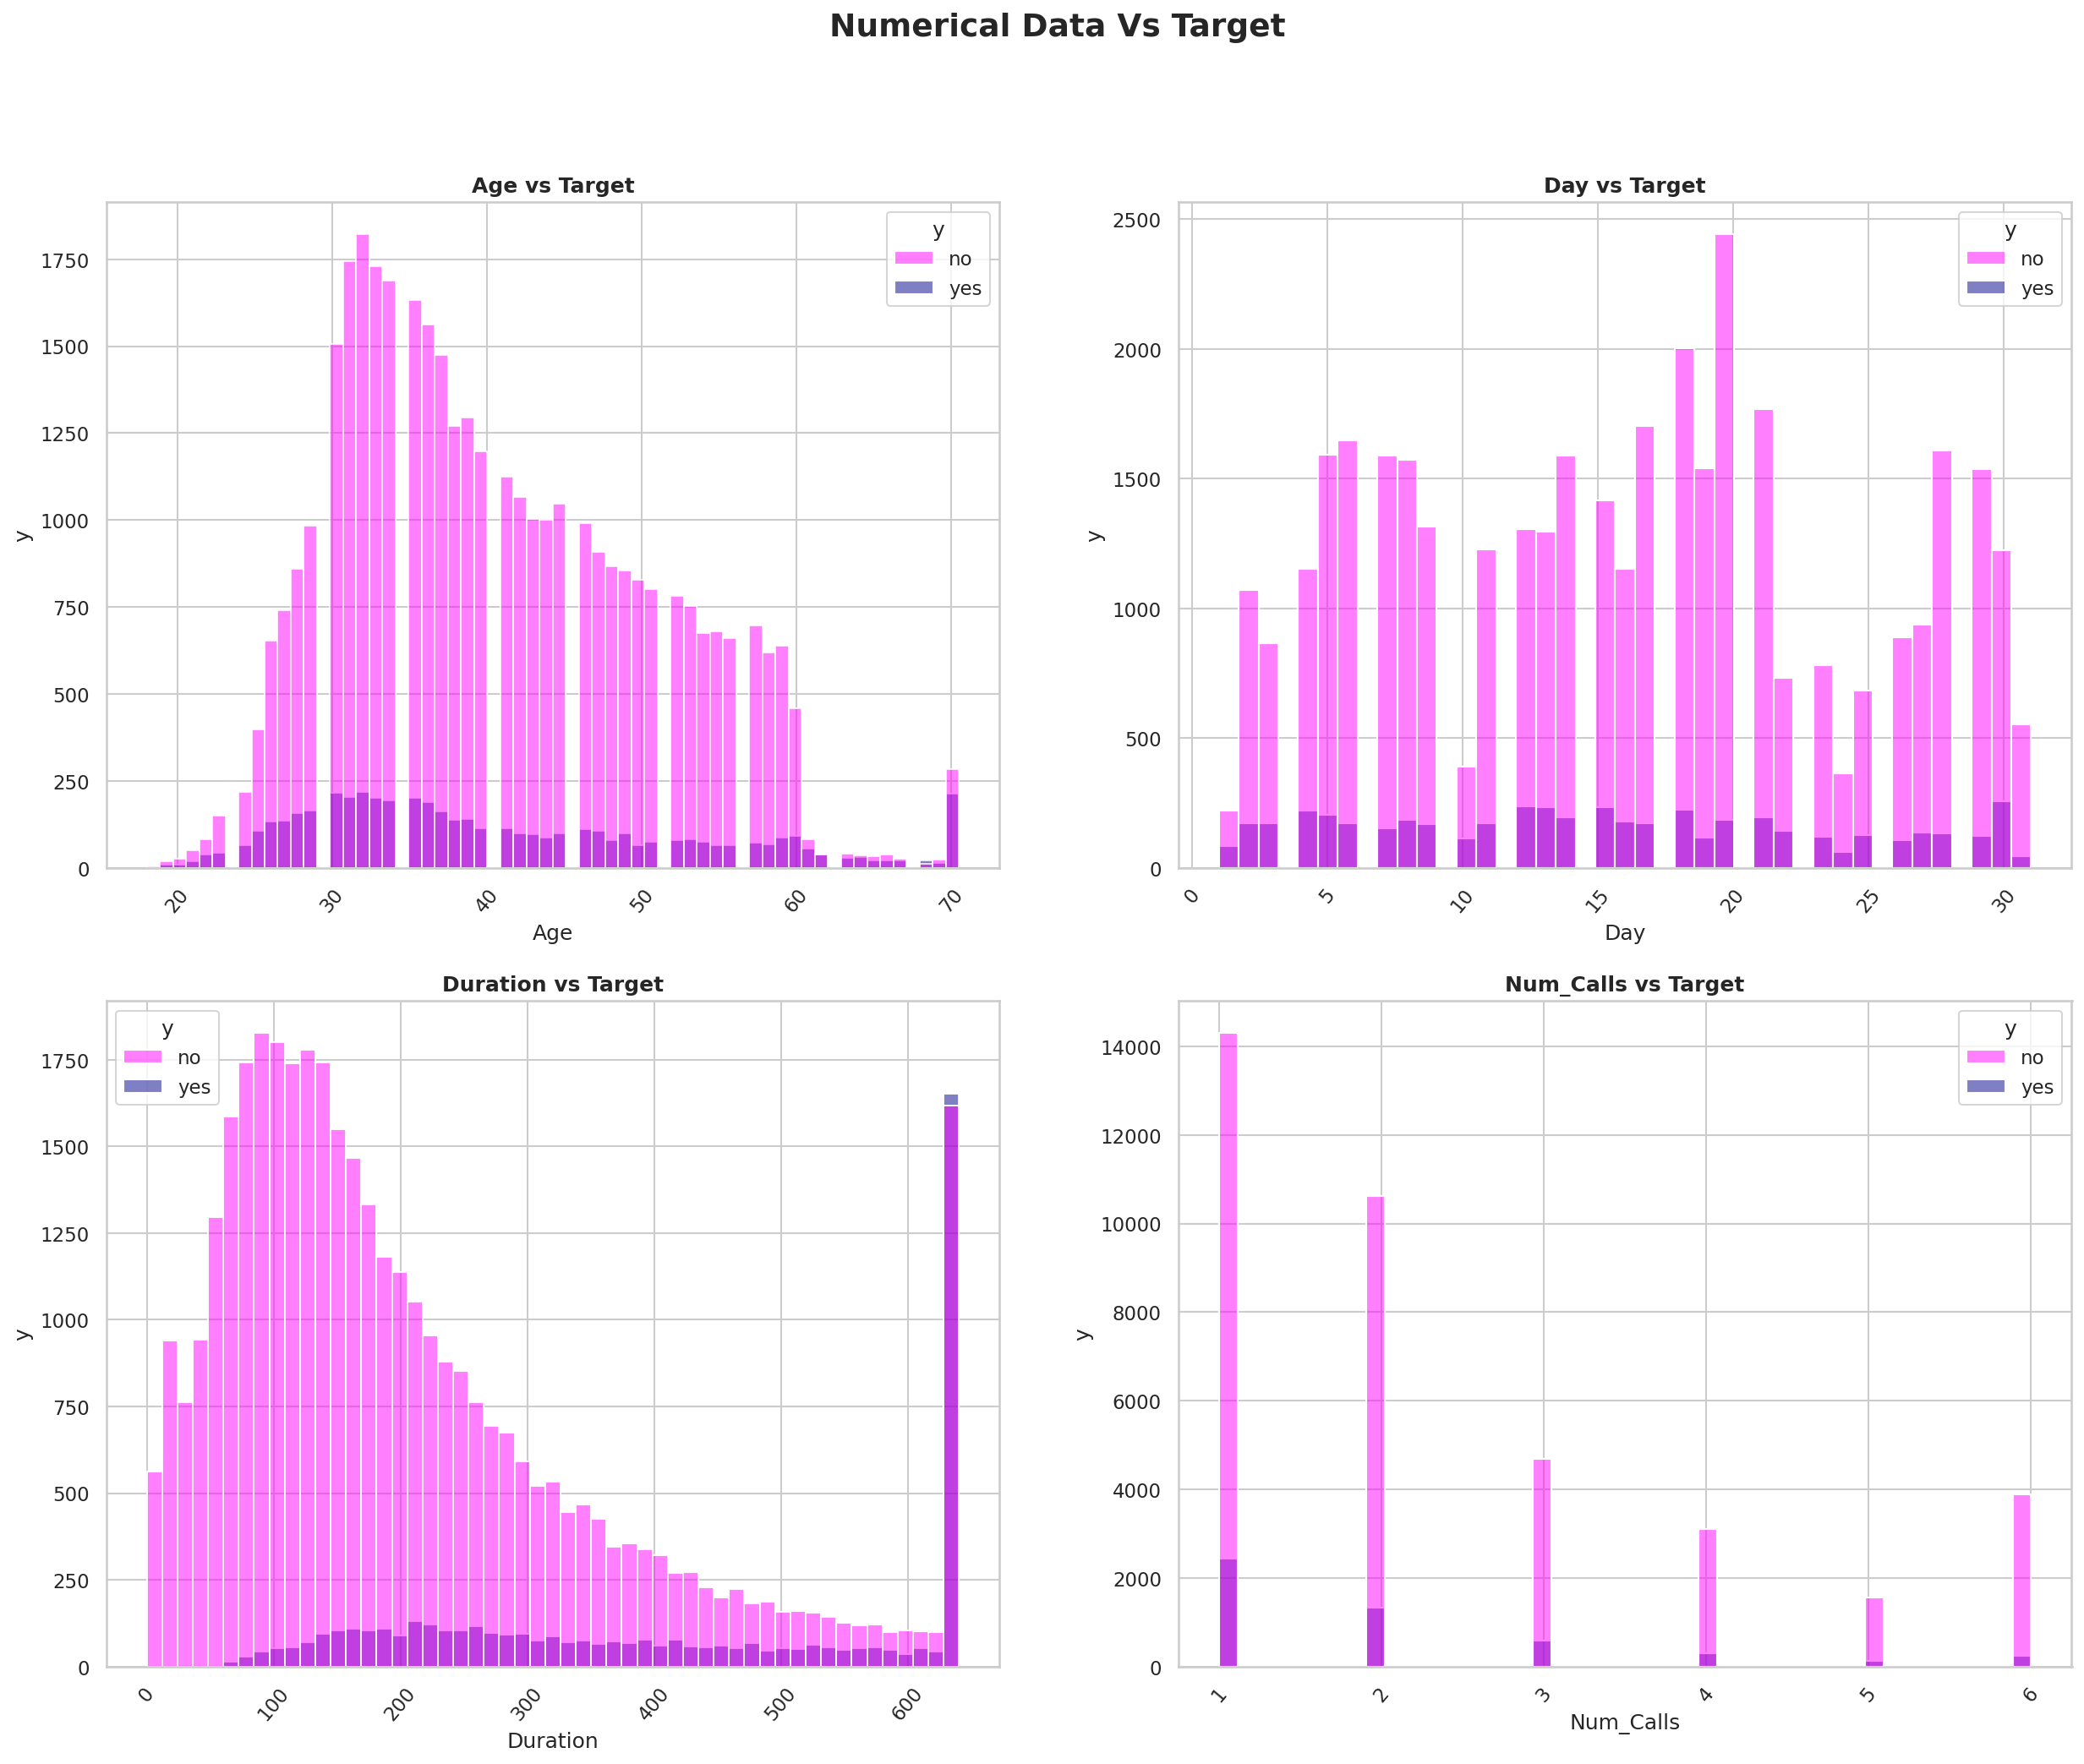

In [189]:
plt.figure(figsize=(20,15), dpi=150)
# Sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold')

# Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('y')
# df[['age','target']].corr()

# Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold')
plt.xlabel('Day')
plt.ylabel('y')
# df[['day','target']].corr()

# Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold')
plt.xlabel('Duration')
plt.ylabel('y')

# No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Num_Calls vs Target', fontweight='bold')
plt.xlabel('Num_Calls')
plt.ylabel('y')

plt.show()


### **Numeric Data vs Target**

**Age vs Target**

*   Target : Middle age people
*   Subscribed : Middle age people

**Day vs Target**

*   Target : Middle of Month
*   Subscribed : Middle of Month

**Duration vs Target**

*  Duration of call is also important to subscribe for insurance.

**Number of Calls vs Target**

*  Number of calls increase subscription also getting increase.


# **Encoding**
In this project i am going to use decision tree so we must do label encoding.

In [190]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

### **Job**

In [191]:
# Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
df.head(3)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0


### **Marital Status**

In [192]:
# Encoding for marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0


### **Educational Qualification**

In [193]:
# Encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0


### **Month**

In [194]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0


### **Call Type**

In [195]:
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0


### **Previous Outcome**

In [196]:
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0


# **Feature and Target Selection**

In [197]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [198]:
# X --> Feature & y --> Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y = df['target'].values

# **Spliting**

In [199]:
# Splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

# **Balancing**

In [200]:
# Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [201]:
print(len(x_train_smt))
print(len(y_train_smt))

52658
52658


# **Scaling**

In [202]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Modelling**

## **Logistic Regression**


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7653391988886317

In [204]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.87397272, 0.12602728],
       [0.991298  , 0.008702  ],
       [0.88792642, 0.11207358],
       ...,
       [0.2286743 , 0.7713257 ],
       [0.13932296, 0.86067704],
       [0.97213846, 0.02786154]])

In [205]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.88


## **K-Nearest Neighbour (KNN)**

In [206]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8683717973477533
K value : 2 Train Score :  0.995632192639295 Cross Value Accuracy : 0.8885161849276855
K value : 3 Train Score :  0.9779900489954043 Cross Value Accuracy : 0.8844653931161753
K value : 4 Train Score :  0.9775342777925481 Cross Value Accuracy : 0.8927992629071714
K value : 5 Train Score :  0.9671464924607847 Cross Value Accuracy : 0.8906003229475129
K value : 6 Train Score :  0.9676022636636409 Cross Value Accuracy : 0.8933781007252908
K value : 7 Train Score :  0.9609556002886551 Cross Value Accuracy : 0.8929158083344062
K value : 8 Train Score :  0.9614683428918683 Cross Value Accuracy : 0.8944196332775418
K value : 9 Train Score :  0.9559800979908086 Cross Value Accuracy : 0.8938406613450068
K value : 10 Train Score :  0.9549356223175965 Cross Value Accuracy : 0.8954615681730399
K value : 20 Train Score :  0.9391165634851305 Cross Value Accuracy : 0.8938409295738381
K value : 30 Train Score :  0.9328117285122869

**k=10 is a good cross validation accuracy of 0.895**

In [207]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.79520722389442
AUROC on the sampled dataset :  0.5430097668637954


## **Decision Tree**

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7880784194396748


In [210]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score # This will help me to do cross-validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # we will tell the DT to not grow past the given threshold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7834327167761783  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.811842455087546  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8696494359831365  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.9074024839530556  Cross val score :  0.895463177546028
Depth  :  5  Training Accuracy :  0.9155683846708952  Cross val score :  0.8967365939230078
Depth  :  6  Training Accuracy :  0.9304948915644347  Cross val score :  0.8946515171022703
Depth  :  7  Training Accuracy :  0.9380151164115614  Cross val score :  0.8936098504356036
Depth  :  8  Training Accuracy :  0.9465608264651145  Cross val score :  0.8917574621260889
Depth  :  9  Training Accuracy :  0.9532074898401003  Cross val score :  0.8909474110553196
Depth  :  10  Training Accuracy :  0.9635762847050781  Cross val score :  0.8906011276340072
Depth  :  20  Training Accuracy :  0.9994112955296441  Cross val score :  0.871729

**k= 5 is the good cross validation score of 0.896**

In [211]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9155683846708952
AUROC on the sampled dataset :  0.8638504192526231


## **XG Boost**

In [212]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) # train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9424778761061947  Cross-Val score :  0.8911779537358913
Learning rate :  0.02  Train score :  0.9522009951004595  Cross-Val score :  0.8945355081326982
Learning rate :  0.03  Train score :  0.9605947814197273  Cross-Val score :  0.8981250804686495
Learning rate :  0.04  Train score :  0.9653993695165027  Cross-Val score :  0.8995139693575384
Learning rate :  0.05  Train score :  0.9686847202704243  Cross-Val score :  0.9000932095189048
Learning rate :  0.1  Train score :  0.977249420790763  Cross-Val score :  0.8995138352431227
Learning rate :  0.11  Train score :  0.9784648106650461  Cross-Val score :  0.8993986309600446
Learning rate :  0.12  Train score :  0.9792434198032588  Cross-Val score :  0.8962722898158878
Learning rate :  0.13  Train score :  0.9800790003418284  Cross-Val score :  0.8999770664349172
Learning rate :  0.14  Train score :  0.9810095332143264  Cross-Val score :  0.8981253486974807
Learning rate :  0.15  Train score :  0.98

**Learning Rate 0.05 is getting the best cross validation score of 0.90**

## **Random Forest**

In [213]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    # max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [214]:
# Doing cross validation to get best value of max_depth to prevent overfitted model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # we will tell the DT to not grow past the given threshold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv=10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9994112955296441  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9994112955296441  Cross val score :  0.8850907482002451
Depth  :  3  Training Accuracy :  0.9994112955296441  Cross val score :  0.8906480122880245
Depth  :  4  Training Accuracy :  0.9994112955296441  Cross val score :  0.8950765361916007
Depth  :  5  Training Accuracy :  0.9994112955296441  Cross val score :  0.8968999385766372
Depth  :  6  Training Accuracy :  0.9994112955296441  Cross val score :  0.8995338695796814
Depth  :  7  Training Accuracy :  0.9994112955296441  Cross val score :  0.9023125602816258
Depth  :  8  Training Accuracy :  0.9994112955296441  Cross val score :  0.9037307779650179
Depth  :  9  Training Accuracy :  0.9994112955296441  Cross val score :  0.9052648117872522
Depth  :  10  Training Accuracy :  0.9994112955296441  Cross val score :  0.9051490207875765


**Depth = 9 is giving the good cross validation score of 0.904**

# **Solution Statement**

Models are tested, below are the AUROC value of each model

*   **Logistic Regression** - AUROC Score is **0.88**
*   **KNN** - AUROC Score is  **0.895**
*   **Decision Tree** - AUROC Score is **0.897**
*   **XG Boost** - AUROC Score is  **0.90**
*   **Random Forest** - AUROC Score is **0.904**

**Hence Random Forest is giving the good AUROC Score of 0.904, so Random Forest is the best model for customer conversion prediction**





# **Feature Importance**

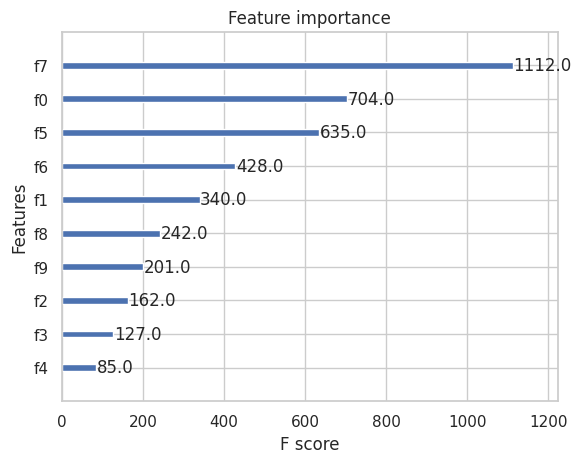

In [215]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(model)
plt.show()

In [216]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

f0 - Age

f1 - Job

f2 - marital status

f3 - educational qualification

f4 - call type

f5 - day

f6 - mon

f7 - dur

f8 - number of calls

f9 - previous outcome

f10 - y


### **Conclusion:**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focuse on the top few features of order given below to have them subscribed to the insurance.

*   Duration - Longer the call better influncing the clients
*   Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.  
*   Day - People who subscribed to insurance are mostly mid of the month.
*   Month - In the month of may people subscribed to insurance are more.
*   Job - In this blue collar people are targeted more but people who subscribed more are from management job.
